# 1. Introduction
## 1.1. Context

* According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, responsible for approximately 11% of all deaths.
* A stroke occurs when the blood supply to part of the brain is cut off or reduced, preventing the brain tissue from receiving oxygen and nutrients.
* A stroke occurs when the blood supply to the brain is cut off or reduced, preventing brain tissue from receiving oxygen and nutrients, so brain cells begin to die within minutes.
* A stroke is a medical emergency and prompt treatment is crucial. Early action can reduce brain damage and other complications.
* This data set is used to predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases, and smoking status. Each row of data provides relevant information about the patient.

## 1.2. Problem Statement

* Improper treatment of people likely to have a stroke can have serious health consequences, including brain damage and death.

## 1.3. Objective

* Understand what are the reasons that cause a stroke in people.
* Visualize the relationships between various healthy and unhealthy habits for stroke.
* Predict the probability of stroke with the best model and hyperfit parameters.

## 1.4. Available Features

**Target**
1. `🏷️ stroke:` 1 if the patient had a stroke or 0 if not.


**Clinical features for predicting stroke events:**

1. `🔢 id:` Unique identifier.
1. `🔤 gender:` "Male", "Female" or "Other".
1. `🔢 age:`: Age of the patient.
1. `🔤 hypertension:` 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
1. `🔤 heart_disease:` 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
1. `🔤 ever_married:` "No" or "Yes".
1. `🔤 work_type:` "Children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
1. `🔤 Residence_type:` "Rural" or "Urban".
1. `🔢 avg_glucose_level:` Average glucose level in blood.
1. `🔢 bmi:` Body mass index.
1. `🔤 smoking_status:` "formerly smoked", "never smoked", "smokes" or "Unknown".


## 1.5. Assumptions

1. `🟢 Validated:` Advancing Age is a significant risk factor for the development of a Stroke. 
2. `🟢 Validated:` Patients with an advanced age and with a BMI have a higher risk of having Stroke.
3. `🟡 Not Proven:` Smokers with a high BMI have a higher risk of having a Stroke.
4. `🟢 Validated:` Patients with hypertension and heart disease are more likely to have a Stroke compared to those without these conditions.
5. `🟢 Validated:` Patients with elevated blood glucose levels have a higher risk of suffering a stroke compared to those with normal blood glucose levels.
6. `🟢 Validated:` Patients who live in urban areas are at higher risk of having a Stroke than those who live in rural areas.
7. `🔴 Invalid:`Married Men have an increased risk of having a Stroke than Married Women .


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Data Visualization.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Dimencionality Reduction.
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Warnings.
import warnings
warnings.filterwarnings("ignore")

# Palette of Colors
palette = sns.husl_palette(h=.5)
palette_matrix = sns.color_palette("light:#5A9", as_cmap=True)

# Load the dataset

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_eda = stroke_data.copy()

# Statistical insights about dataset


In [3]:
stroke_data.describe(include='all').fillna('-').round(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.0,5110,5110.0,5110.0,5110.0,5110,5110,5110,5110.0,4909.0,5110,5110.0
unique,-,3,-,-,-,2,5,2,-,-,4,-
top,-,Female,-,-,-,Yes,Private,Urban,-,-,never smoked,-
freq,-,2994,-,-,-,3353,2925,2596,-,-,1892,-
mean,36517.829354,-,43.226614,0.097456,0.054012,-,-,-,106.147677,28.893237,-,0.048728
std,21161.721625,-,22.612647,0.296607,0.226063,-,-,-,45.28356,7.854067,-,0.21532
min,67.0,-,0.08,0.0,0.0,-,-,-,55.12,10.3,-,0.0
25%,17741.25,-,25.0,0.0,0.0,-,-,-,77.245,23.5,-,0.0
50%,36932.0,-,45.0,0.0,0.0,-,-,-,91.885,28.1,-,0.0
75%,54682.0,-,61.0,0.0,0.0,-,-,-,114.09,33.1,-,0.0


In [4]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Perform exploratory data analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

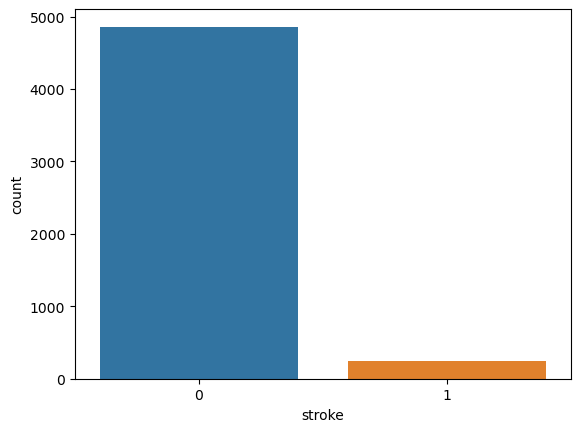

In [5]:
sns.countplot(x='stroke', data=stroke_data)

In [6]:
bmi_na = stroke_data['bmi'].isna().sum()

# Get the Mean of the feature 'bmi'.
bmi_str = stroke_data['bmi'].std()

# Get the Mean of the feature 'bmi'.
bmi_median = stroke_data['bmi'].median()

print("'bmi' NA count: ", bmi_na)
print("'bmi' Str : ", bmi_str)
print("'bmi' Median : ", bmi_median)

'bmi' NA count:  201
'bmi' Str :  7.854066729680158
'bmi' Median :  28.1


# We fill NA of the feature 'bmi' with the median of its values.

In [7]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(bmi_median)
print("'bmi' NA count after fill: ", stroke_data['bmi'].isna().sum())

'bmi' NA count after fill:  0


# Preprocess the data

In [8]:
stroke_data = stroke_data.drop(['id'], axis=1) # Remove unnecessary columns
stroke_data = pd.get_dummies(stroke_data, drop_first=True) # One-hot encoding for categorical variables
stroke_data = stroke_data.dropna() # Remove missing values

In [9]:
features_cat = stroke_data.select_dtypes(include=['object', 'int64']).columns
features_cat = features_cat.drop(['stroke'])

features_num = stroke_data.select_dtypes(include='float64').columns

target = stroke_data['stroke']

features_encode = stroke_data.drop(['stroke'], axis=1)

# The Principal Component Analysis (PCA) transformer is instantiated.


In [10]:
pca = PCA(n_components=2)
# The features of the DF "feature encoder" are transformed into 2 main features.
df_pca = pca.fit_transform(features_encode)

# A DF is created with the result of the transformation.
df_pca = pd.DataFrame(df_pca, columns=['feature_1','feature_2'])

# A DF is created with the result of the transformation.
df_reduce = pd.concat([df_pca, stroke_data['stroke']], axis=1)

# It is obtained that both the variance was preserved.
variance = ((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100).round(2)

print(f"After PCA the variance for each feature was preserved in a: {variance}%\n")
print(df_reduce.head())

After PCA the variance for each feature was preserved in a: 97.96%

    feature_1  feature_2  stroke
0  124.928142  -5.024924       1
1   97.576797  -2.340395       1
2    5.547777 -36.531708       1
3   65.341816   3.897361       1
4   72.470168 -23.948346       1


# Data Analysis

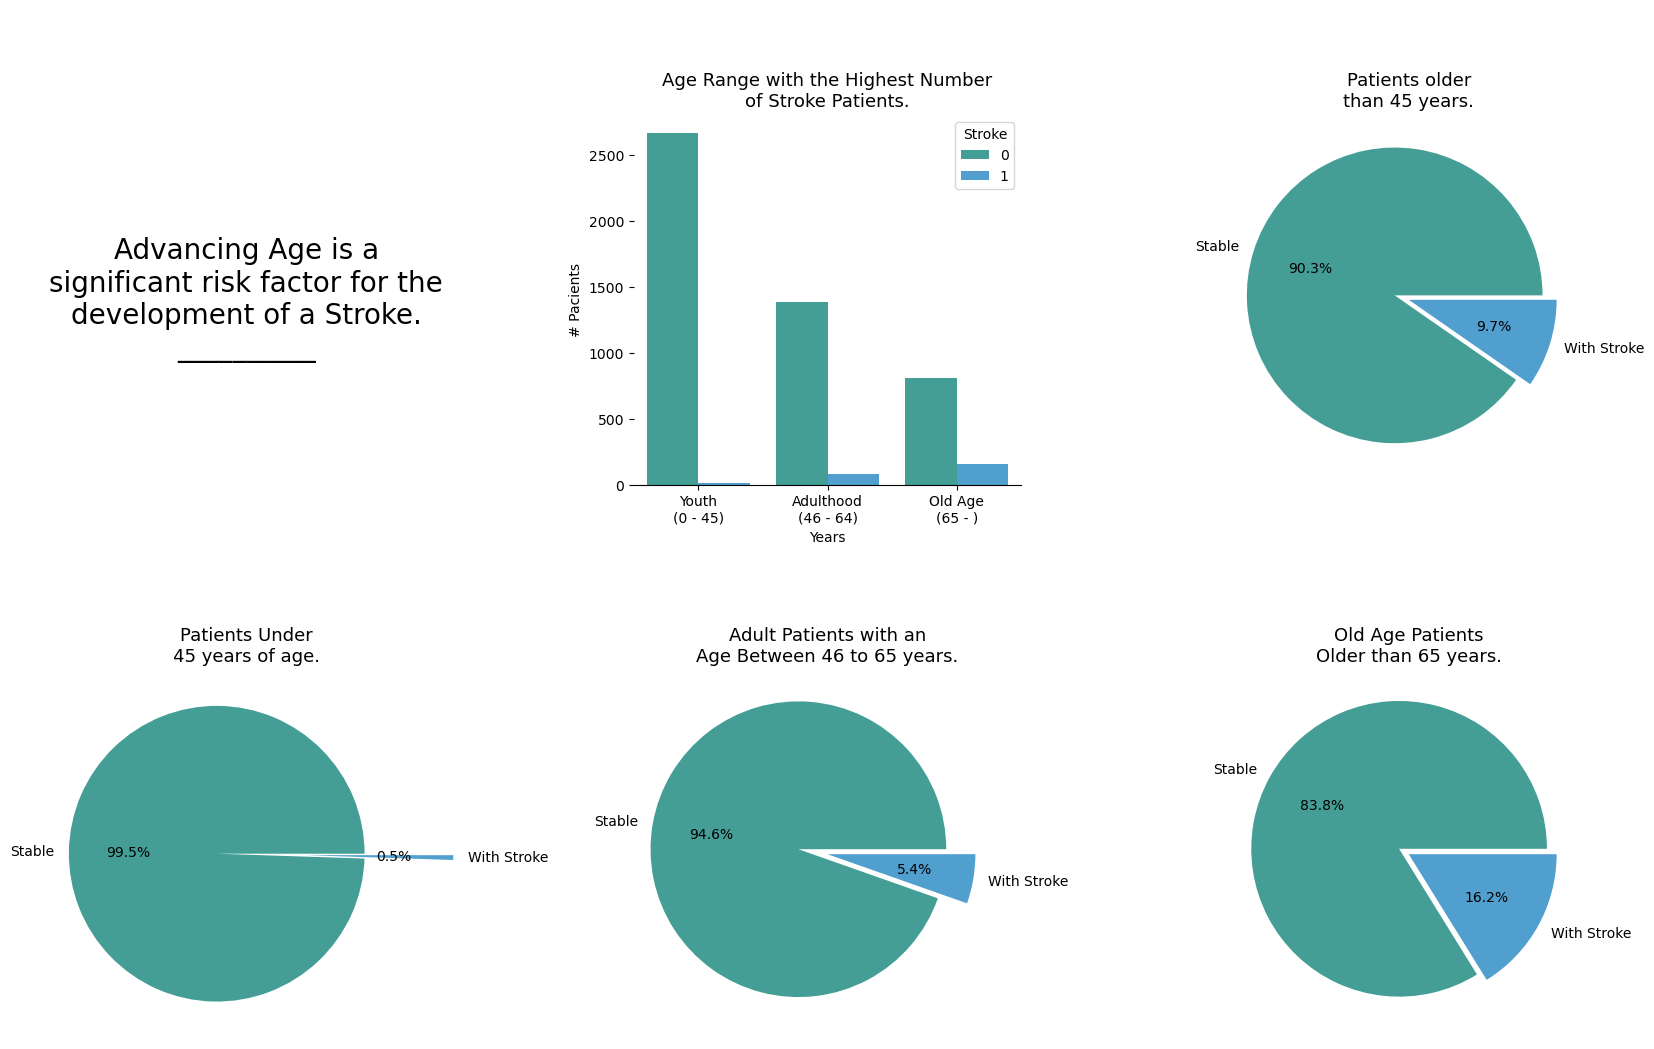

In [11]:
# DF of patients categorized by age range.
df_eda['age_range'] = pd.cut(df_eda['age'], bins=[0, 46, 65, np.inf], include_lowest=True,
                             labels=["Youth\n(0 - 45)", "Adulthood\n(46 - 64)", "Old Age\n(65 - )"])

df_eda['old_age'] = pd.cut(df_eda['age'], bins=[0, 46, np.inf], include_lowest=True,
                             labels=["Youth", "Adulthood & Old Age"])

# Adulthood & Old Age.
adul_old = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age") & (df_eda['stroke'] == 0)])
adul_old_stroke = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age") & (df_eda['stroke'] == 1)])
adul_old_total = len(df_eda.loc[(df_eda['old_age'] == "Adulthood & Old Age")])
adul_old = round((adul_old / adul_old_total) * 100, 2)
adul_old_stroke = round((adul_old_stroke / adul_old_total) * 100, 2)
patients_adul_old = [adul_old, adul_old_stroke]

# Youth.
youth = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)") & (df_eda['stroke'] == 0)])
youth_stroke = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)") & (df_eda['stroke'] == 1)])
youth_total = len(df_eda.loc[(df_eda['age_range'] == "Youth\n(0 - 45)")])
youth = round((youth / youth_total) * 100, 2)
youth_stroke = round((youth_stroke / youth_total) * 100, 2)
patients_youth = [youth, youth_stroke]

# Adulthood.
adul = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)") & (df_eda['stroke'] == 0)])
adul_stroke = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)") & (df_eda['stroke'] == 1)])
adul_total = len(df_eda.loc[(df_eda['age_range'] == "Adulthood\n(46 - 64)")])
adul = round((adul / adul_total) * 100, 2)
adul_stroke = round((adul_stroke / adul_total) * 100, 2)
patients_adul = [adul, adul_stroke]

# Old Age.
old = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )") & (df_eda['stroke'] == 0)])
old_stroke = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )") & (df_eda['stroke'] == 1)])
old_total = len(df_eda.loc[(df_eda['age_range'] == "Old Age\n(65 - )")])
old = round((old / old_total) * 100, 2)
old_stroke = round((old_stroke / old_total) * 100, 2)
patients_old = [old, old_stroke]

# Plot
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.5)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Advancing Age is a\nsignificant risk factor for the\ndevelopment of a Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Age Range.
ax1 = fig.add_subplot(gs[0,1])
ax1 = sns.countplot(df_eda['age_range'], hue=df_eda['stroke'], palette=palette)
ax1.set_title(f"\n\n\nAge Range with the Highest Number\nof Stroke Patients.", fontsize=13)
ax1.legend(title='Stroke')
ax1.spines[['top', 'right', 'left']].set_visible(False)
ax1.set_xlabel('Years')
ax1.set_ylabel('# Pacients')

# Plot Adul Old.
ax2 = fig.add_subplot(gs[0, 2])
ax2 = plt.pie(patients_adul_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("Patients older\nthan 45 years.", fontsize=13)

# Plot Youth.
ax2 = fig.add_subplot(gs[1, 0])
ax2 = plt.pie(patients_youth, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0.4], colors = ['#449E95', '#509FCF'])
plt.title("Patients Under\n45 years of age.", fontsize=13)

# Plot Adul.
ax2 = fig.add_subplot(gs[1, 1])
ax2 = plt.pie(patients_adul, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("Adult Patients with an\nAge Between 46 to 65 years.", fontsize=13)

# Plot Old.
ax2 = fig.add_subplot(gs[1, 2])
ax2 = plt.pie(patients_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.075, 0], colors = ['#449E95', '#509FCF'])
plt.title("Old Age Patients\nOlder than 65 years.", fontsize=13)

plt.show()

# Patients with an Advanced Age and with a BMI have a higher risk of having Stroke.

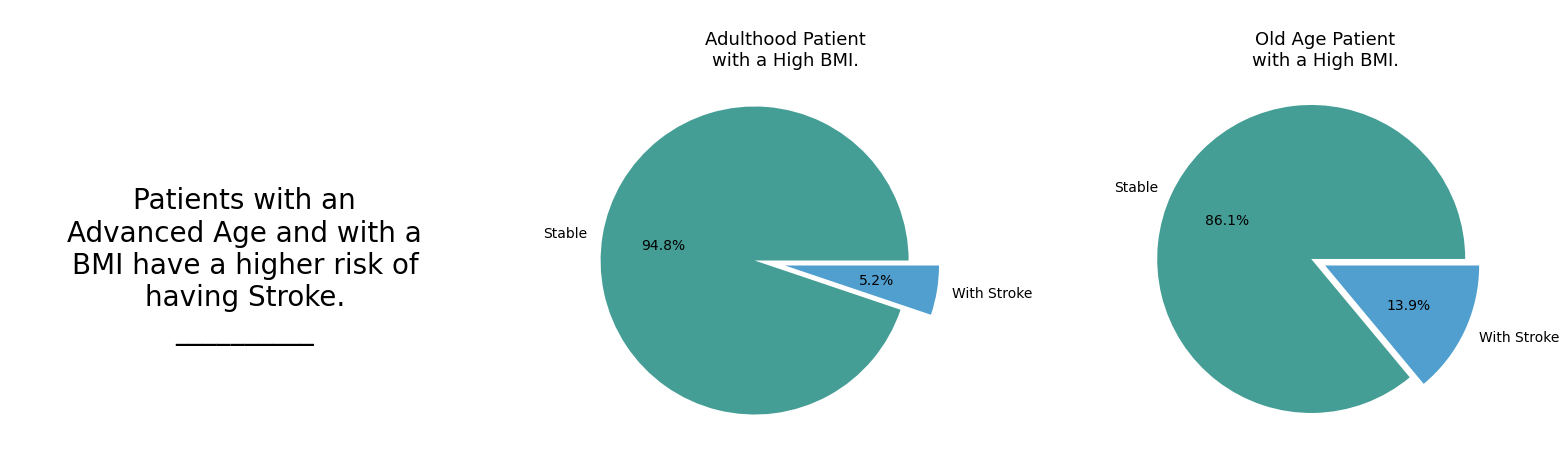

In [12]:
# DF of Patients categorized by their high BMI
df_eda['high BMI'] = pd.cut(df_eda['bmi'], bins=[0, 18.5, 24.9, np.inf], include_lowest=True,
                            labels=["Below Average", "Normal", "High BMI"])

# Adulthood.
adul_h_AgeBMI = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
adul_h_AgeBMI_stroke = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
adul_h_AgeBMI_total = len(df_eda.loc[(df_eda['age_range'] == 'Adulthood\n(46 - 64)') & (df_eda['high BMI'] == 'High BMI')])
adul_h_AgeBMI = round((adul_h_AgeBMI / adul_h_AgeBMI_total) * 100, 2)
adul_h_AgeBMI_stroke = round((adul_h_AgeBMI_stroke / adul_h_AgeBMI_total) * 100, 2)
pacients_adul_h_AgeBMI_total = [adul_h_AgeBMI, adul_h_AgeBMI_stroke]

# Old Age.
old_h_AgeBMI = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
old_h_AgeBMI_stroke = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
old_h_AgeBMI_total = len(df_eda.loc[(df_eda['age_range'] == 'Old Age\n(65 - )') & (df_eda['high BMI'] == 'High BMI')])
old_h_AgeBMI = round((old_h_AgeBMI / old_h_AgeBMI_total) * 100, 2)
old_h_AgeBMI_stroke = round((old_h_AgeBMI_stroke / old_h_AgeBMI_total) * 100, 2)
pacients_old_h_AgeBMI = [old_h_AgeBMI, old_h_AgeBMI_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with an\nAdvanced Age and with a\nBMI have a higher risk of\nhaving Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Adulthood.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(pacients_adul_h_AgeBMI_total, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nAdulthood Patient\nwith a High BMI.", fontsize=13)

# Plot Old.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(pacients_old_h_AgeBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nOld Age Patient\nwith a High BMI.", fontsize=13)

plt.show()

# Smokers with a high BMI have a higher risk of having a Stroke

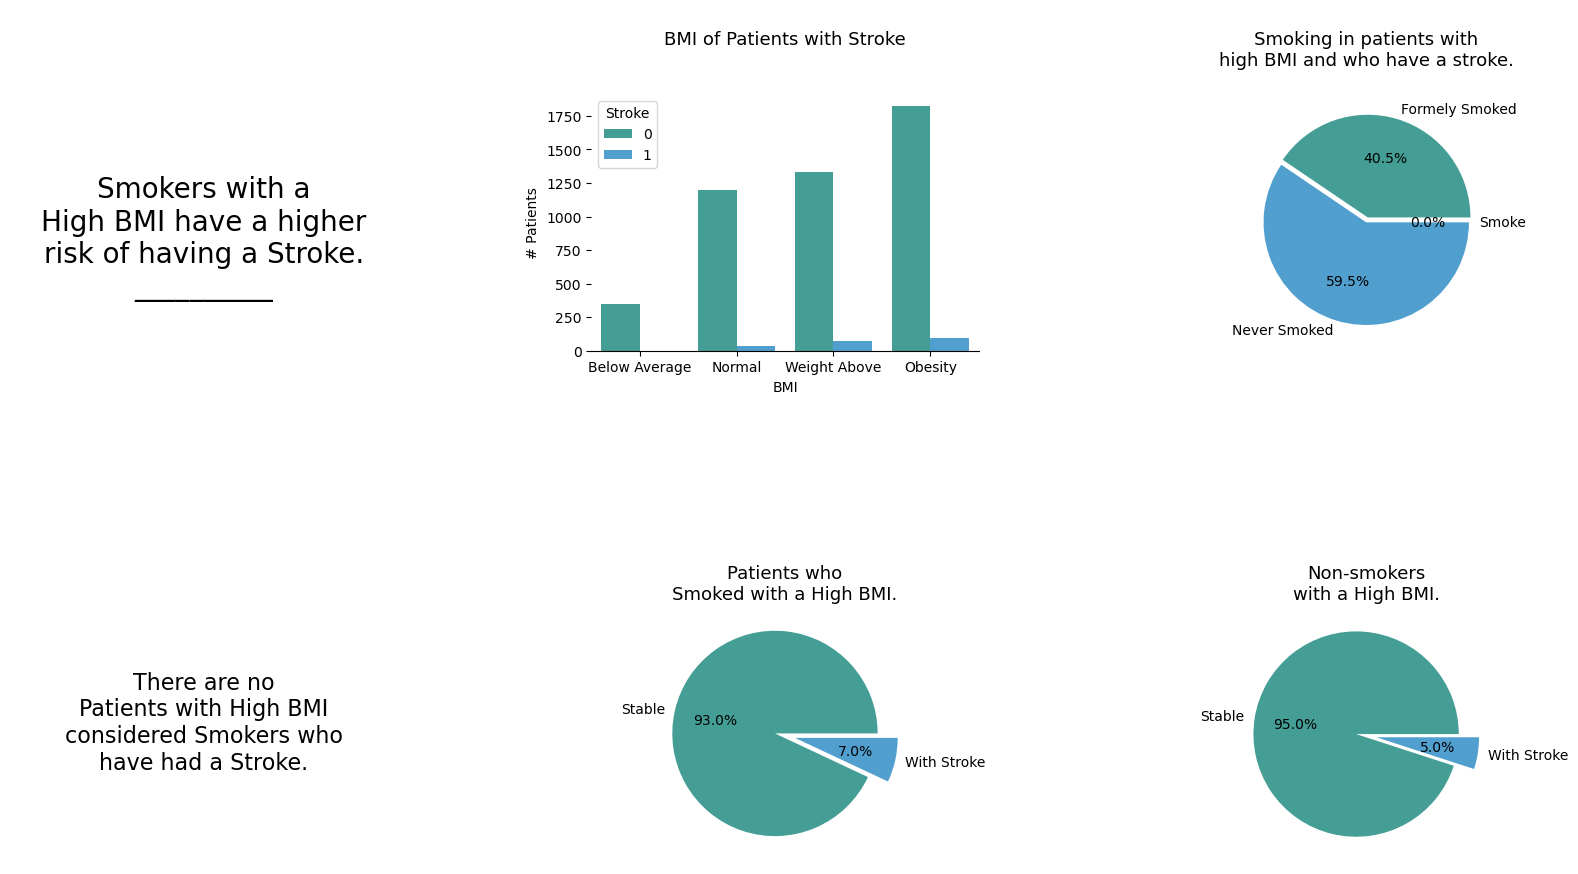

In [13]:
# DF of Patients categorized by their BMI
df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], include_lowest=True,
                            labels=["Below Average", "Normal", "Weight Above", "Obesity"])                           

# Smoke Status Stroke.
smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'smoke') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
f_smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
no_smokes_stroke_len = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])

# Formerly Smokes.
f_smokes = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
f_smokes_stroke = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
f_smokes_total = len(df_eda.loc[(df_eda['smoking_status'] == 'formerly smoked') & (df_eda['high BMI'] == 'High BMI')])
f_smokes = round((f_smokes / f_smokes_total) * 100, 2)
f_smokes_stroke = round((f_smokes_stroke / f_smokes_total) * 100, 2)
f_smoke_highBMI = [f_smokes, f_smokes_stroke]

# No Smokes.
no_smokes = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 0)])
no_smokes_stroke = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['high BMI'] == 'High BMI') & (df_eda['stroke'] == 1)])
no_smokes_total = len(df_eda.loc[(df_eda['smoking_status'] == 'never smoked') & (df_eda['high BMI'] == 'High BMI')])
no_smoke = round((no_smokes / no_smokes_total) * 100, 2)
no_smokes_stroke = round((no_smokes_stroke / no_smokes_total) * 100, 2)
no_smoke_highBMI = [no_smoke, no_smokes_stroke]

# Plots
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=1)

# Plot Title High BMI
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'\nSmokers with a\nHigh BMI have a higher\nrisk of having a Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot
ax1 = fig.add_subplot(gs[0,1])
ax1 = sns.countplot(df_eda['bmi_cat'], hue=df_eda['stroke'], palette=palette)
ax1.set_title(f"\nBMI of Patients with Stroke\n\n", fontsize=13)
ax1.legend(title='Stroke')
ax1.spines[['top', 'right', 'left']].set_visible(False)
ax1.set_xlabel('BMI')
ax1.set_ylabel('# Patients')

# Plot Smoke Status Stroke.
ax2 = fig.add_subplot(gs[0,2])
ax2 = plt.pie([smokes_stroke_len,f_smokes_stroke_len, no_smokes_stroke_len], autopct='%1.1f%%', explode=[0, 0.05, 0],
              labels = ['Smoke', 'Formely Smoked', 'Never Smoked'], colors = ['#D37EE3', '#449E95', '#509FCF'])
plt.title("\nSmoking in patients with\nhigh BMI and who have a stroke.\n", fontsize=13)

# Plot Title Smoke
ax3 = fig.add_subplot(gs[1,0])
ax3.text(0.5,0.5,'There are no\nPatients with High BMI\nconsidered Smokers who\nhave had a Stroke.\n',
         fontsize=16, horizontalalignment='center', verticalalignment='center')
ax3.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])

# Plot Formerly Smokes.
ax4 = fig.add_subplot(gs[1,1])
ax4 = plt.pie(f_smoke_highBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("Patients who\nSmoked with a High BMI.", fontsize=13)

# Plot No Smokes.
ax5 = fig.add_subplot(gs[1,2])
ax5 = plt.pie(no_smoke_highBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("Non-smokers\nwith a High BMI.", fontsize=13)

plt.show()

# Patients with Hypertension and Heart Disease are more likely to have a Stroke compared to those without these conditions

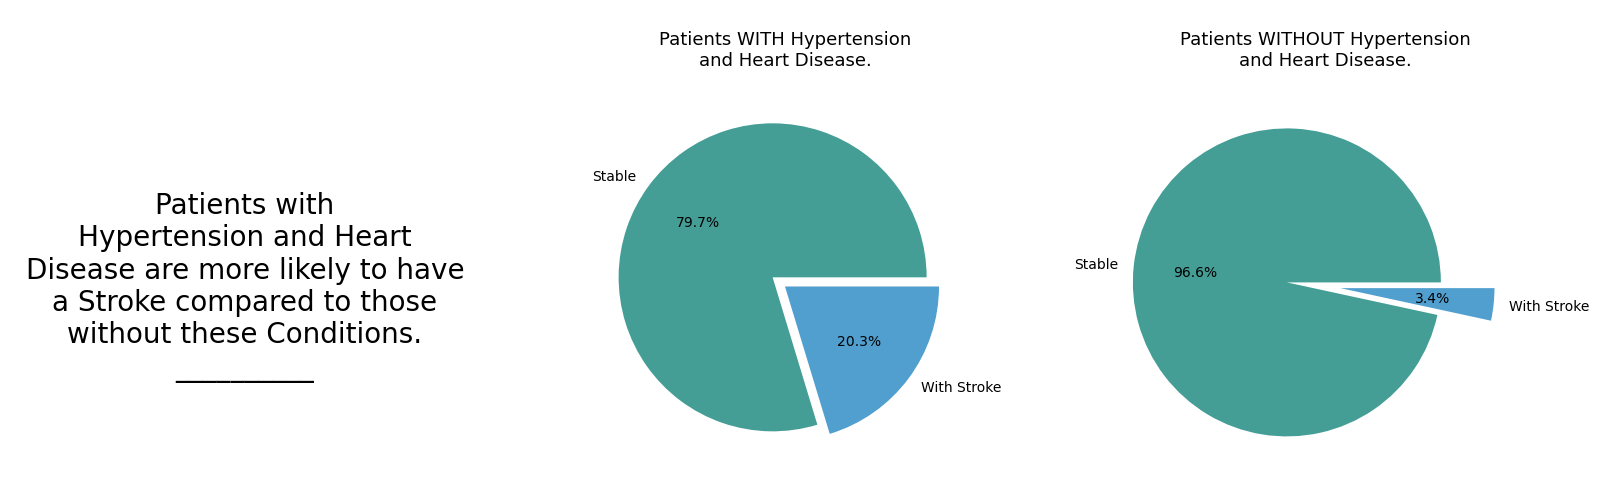

In [14]:
# With.
with_hh = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1) & (df_eda['stroke'] == 0)])
with_hh_stroke = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1) & (df_eda['stroke'] == 1)])
with_hh_total = len(df_eda.loc[(df_eda['hypertension'] == 1) & (df_eda['heart_disease'] == 1)])
with_hh = round((with_hh / with_hh_total) * 100, 2)
with_hh_stroke = round((with_hh_stroke / with_hh_total) * 100, 2)
patients_with_hh = [with_hh, with_hh_stroke]

# Without.
without_hh = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0) & (df_eda['stroke'] == 0)])
without_hh_stroke = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0) & (df_eda['stroke'] == 1)])
without_hh_total = len(df_eda.loc[(df_eda['hypertension'] == 0) & (df_eda['heart_disease'] == 0)])
without_hh = round((without_hh / without_hh_total) * 100, 2)
without_hh_stroke = round((without_hh_stroke / without_hh_total) * 100, 2)
patients_without_hh = [without_hh, without_hh_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with\nHypertension and Heart\nDisease are more likely to have\na Stroke compared to those\nwithout these Conditions.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot With.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_with_hh, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients WITH Hypertension\nand Heart Disease.\n", fontsize=13)

# Plot Without.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_without_hh, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.25, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients WITHOUT Hypertension\nand Heart Disease.\n", fontsize=13)

plt.show()

# Patients with elevated Blood Glucose levels have a higher risk of suffering a Stroke compared to those with Normal Glucose Levels

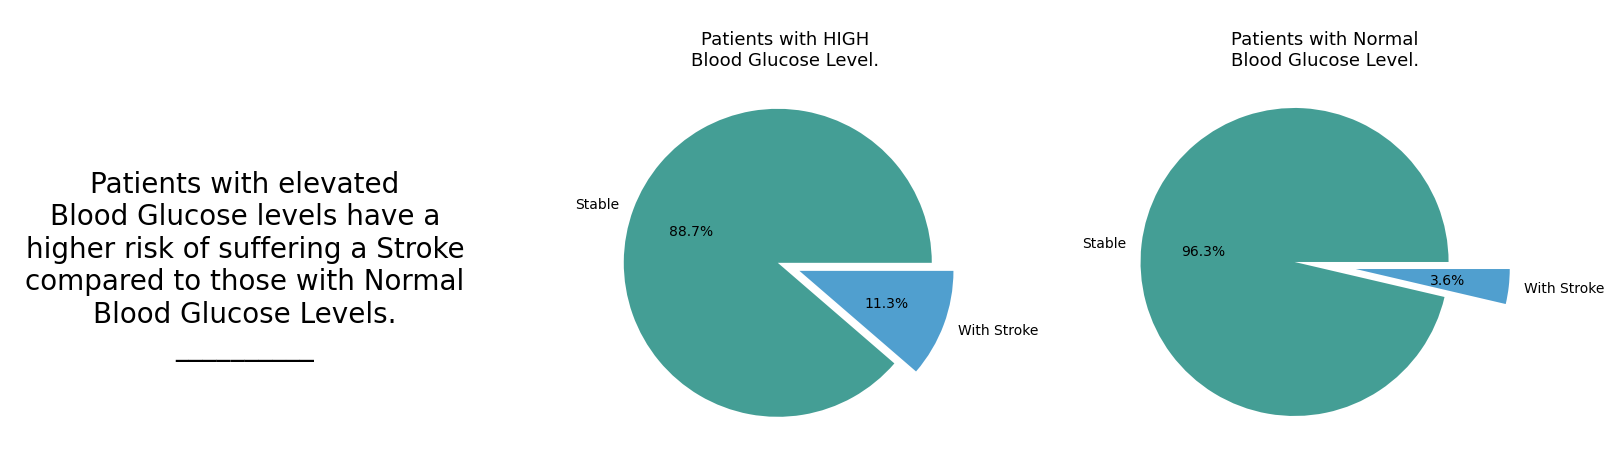

In [15]:
df_eda['avg_gluc_lvl_range'] = pd.cut(df_eda['avg_glucose_level'], bins=[0, 70, 140, np.inf], include_lowest=True,
                                          labels=["Low Level", "Normal Level", "High Level"])

# High. 
high = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level') & (df_eda['stroke'] == 0)])
high_stroke =  len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level') & (df_eda['stroke'] == 1)])
high_total = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'High Level')])
high = round((high / high_total) * 100, 2)
high_stroke = round((high_stroke / high_total) * 100, 2)
patients_high = [high, high_stroke]

# Normal.
normal = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level') & (df_eda['stroke'] == 0)])
normal_stroke = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level') & (df_eda['stroke'] == 1)])
normal_total = len(df_eda.loc[(df_eda['avg_gluc_lvl_range'] == 'Normal Level')])
normal = round((normal / normal_total) * 100, 2)
normal_stroke = round((normal_stroke / normal_total) * 100, 2)
patients_normal = [normal, normal_stroke]

# Plot.
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title.
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients with elevated\nBlood Glucose levels have a\nhigher risk of suffering a Stroke\ncompared to those with Normal\nBlood Glucose Levels.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot High.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_high, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.05, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients with HIGH\nBlood Glucose Level.", fontsize=13)

# Plot Low.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_normal, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0.2], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients with Normal\nBlood Glucose Level.", fontsize=13)

plt.show()

# Patients who live in Urban Areas are at Higher risk of having a Stroke than those who live in Rural Areas.

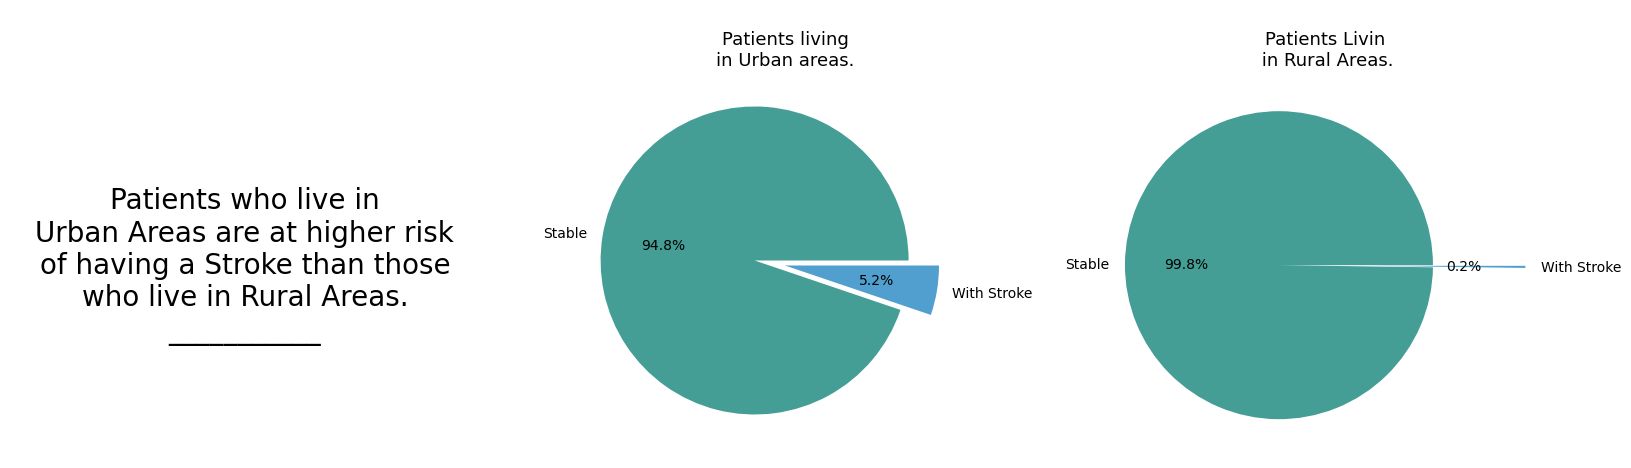

In [16]:
# Urban
urban = len(df_eda.loc[(df_eda['Residence_type'] == 'Urban') & (df_eda['stroke'] == 0)])
urban_stroke =  len(df_eda.loc[(df_eda['Residence_type'] == 'Urban') & (df_eda['stroke'] == 1)])
urban_total = len(df_eda.loc[(df_eda['Residence_type'] == 'Urban')])
urban = round((urban / urban_total) * 100, 2)
urban_stroke = round((urban_stroke / urban_total) * 100, 2)
patients_urban = [urban, urban_stroke]

# Rural
rural = len(df_eda.loc[(df_eda['Residence_type'] == 'Rural') & (df_eda['stroke'] == 0)])
rural_stroke =  len(df_eda.loc[(df_eda['Residence_type'] == 'Rural') & (df_eda['stroke'] == 1)])
rural_total = len(df_eda.loc[(df_eda['Residence_type'] == 'Rural')])
rural = round((rural / rural_total) * 100, 2)
rural_stroke = round((urban_stroke / rural_total) * 100, 2)
patients_rural = [rural, rural_stroke]


# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Patients who live in\nUrban Areas are at higher risk\nof having a Stroke than those\nwho live in Rural Areas.\n___________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Urban.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_urban, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients living\nin Urban areas.", fontsize=13)

# Plot Rural.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_rural, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.3, 0.3], colors = ['#449E95', '#509FCF'])
plt.title("\nPatients Livin\n in Rural Areas.", fontsize=13)

plt.show()

# Married Men have an increased risk of having a Stroke than Married Women

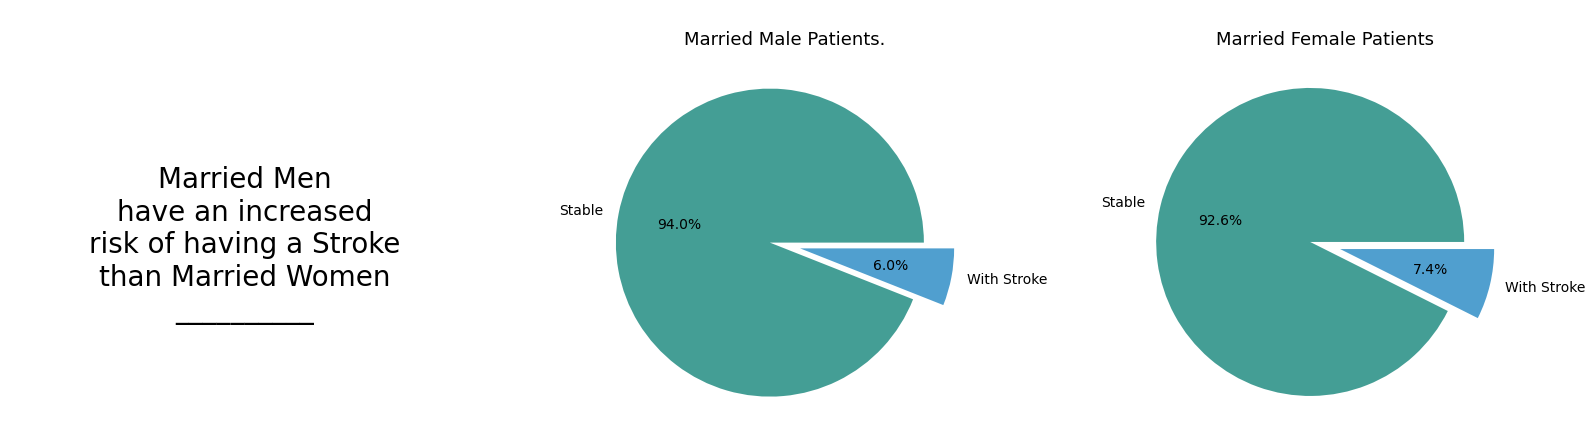

In [17]:
# Female
female = len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 0)])
female_stroke =  len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 1)])
female_total = len(df_eda.loc[(df_eda['gender'] == 'Female') & (df_eda['ever_married'] == 'Yes')])
female = round((female / female_total) * 100, 2)
female_stroke = round((female_stroke / female_total) * 100, 2)
patients_female = [female, female_stroke]

# Male
male = len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 0)])
male_stroke =  len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes') & (df_eda['stroke'] == 1)])
male_total = len(df_eda.loc[(df_eda['gender'] == 'Male') & (df_eda['ever_married'] == 'Yes')])
male = round((male / male_total) * 100, 2)
male_stroke = round((male_stroke / male_total) * 100, 2)
patients_male = [male, male_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Married Men\nhave an increased\nrisk of having a Stroke\nthan Married Women\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines[["bottom", "top", "left", "right"]].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot High.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_female, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nMarried Male Patients.", fontsize=13)

# Plot Low.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_male, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nMarried Female Patients", fontsize=13)

plt.show()

# Analysis of Categorical Features

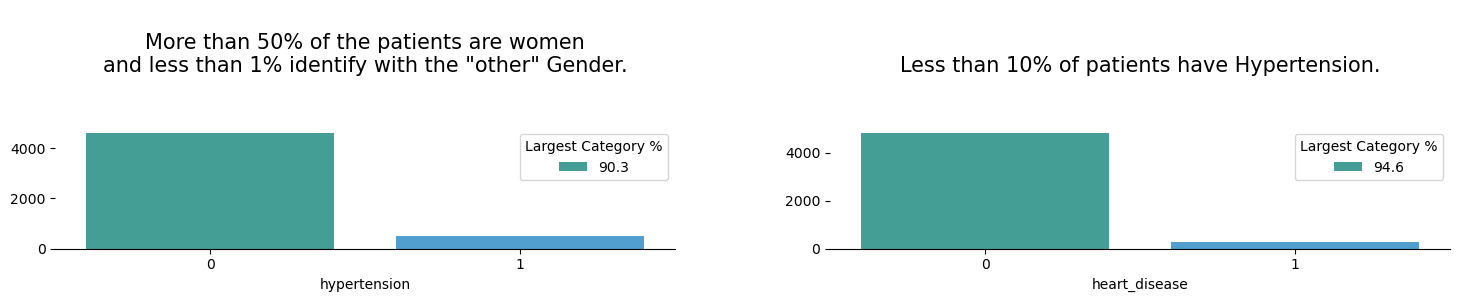

In [19]:
# Plot Description.
description = [str(f'\nMore than 50% of the patients are women\nand less than 1% identify with the "other" Gender.\n\n'),
               str(f'Less than 10% of patients have Hypertension.\n\n'),
               str(f'5.4% of patients have a Heart Disease.\n\n'),
               str(f'65% of patients have Ever Married.\n\n'),
               str(f'86% of the patients have a Type Work while\n13% are children and less than 1% have never worked.\n\n'),
               str(f'The same percentage of patients\nlive in Urban areas than in Rural areas.\n\n'),
               str(f'Of the patients, 37% do not smoke, 17% have smoked,\n15% are smokers and the status of 35% is unknown.\n\n')]

# Grid Plot.
fig = plt.figure(figsize=(18,30))
gs =  gridspec.GridSpec(7,2)
gs.update(wspace=0.25, hspace=2.0)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_cat.values):
    ax = plt.subplot(gs[i])
    sns.countplot(stroke_data[j], palette=palette, order=[x for x in stroke_data[j].value_counts().index])
    ax.set_title(description[i], fontsize=15)
    ax.legend([((x/len(stroke_data)*100).round(1)) for x in stroke_data[j].value_counts().values], title='Largest Category %')
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')
plt.show()

# Analysis of Numerical Features

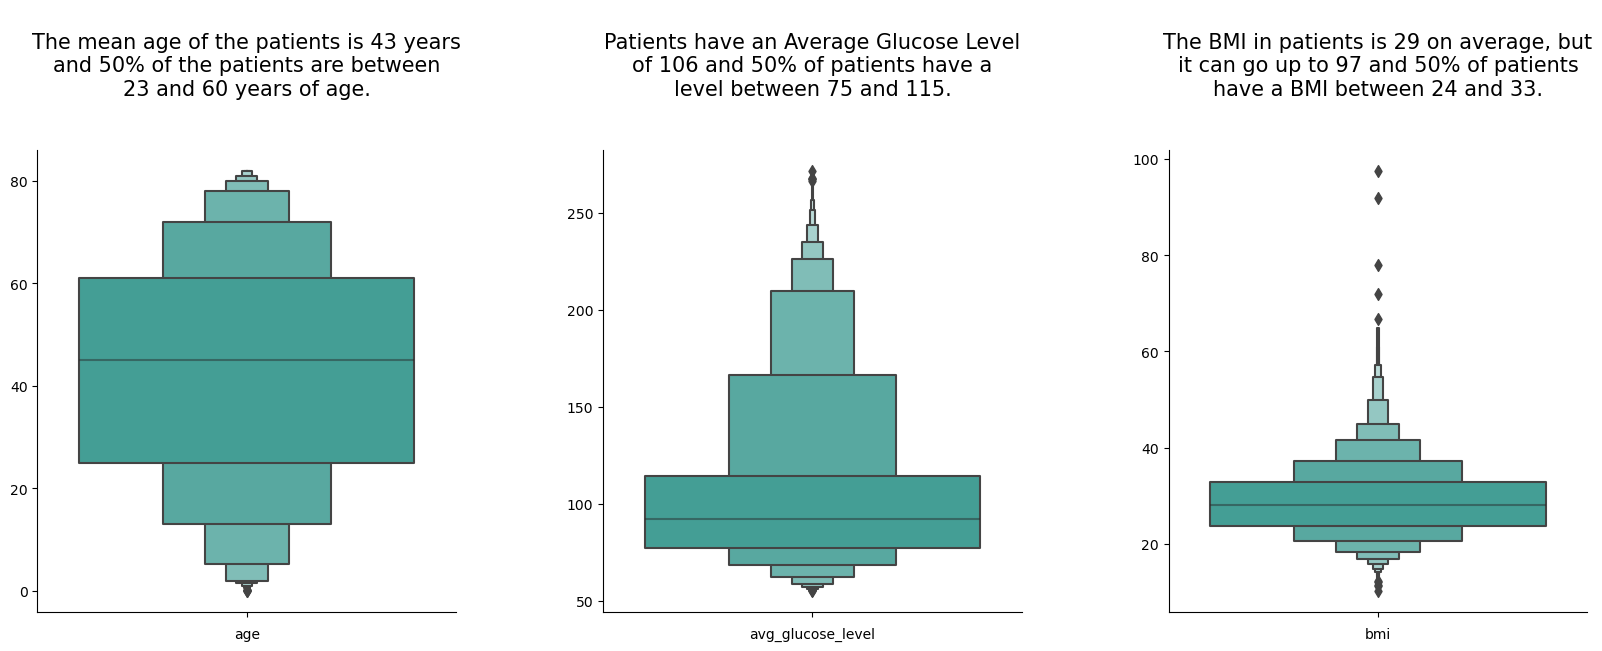

In [20]:
# Plot Description.
description = [str(f'\nThe mean age of the patients is 43 years\nand 50% of the patients are between\n23 and 60 years of age.\n\n'),
               str(f'Patients have an Average Glucose Level\nof 106 and 50% of patients have a\nlevel between 75 and 115.\n\n'),
               str(f'The BMI in patients is 29 on average, but\nit can go up to 97 and 50% of patients\nhave a BMI between 24 and 33.\n\n')]

# Grid Plot.
fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(1,3)
gs.update(wspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_num.values):
    ax = plt.subplot(gs[i])
    sns.boxenplot(y=stroke_data[j], palette=palette)
    ax.set_title(description[i], fontsize=15)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')
plt.show()

# Target Analysis

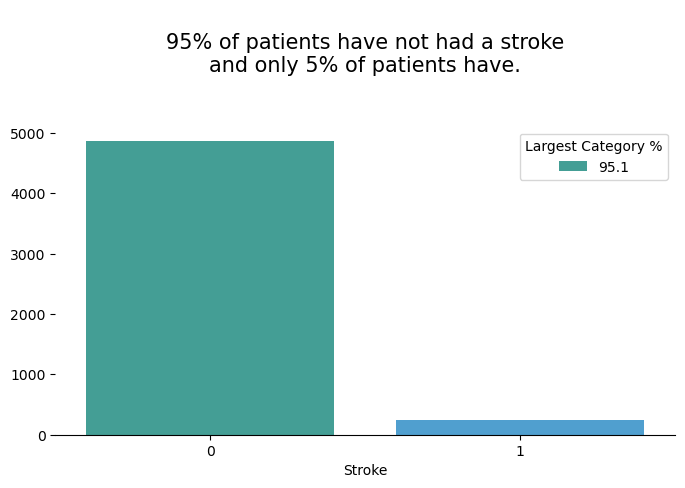

In [21]:
# Plot.
fig, ax = plt.subplots(figsize=(8, 4))
ax= sns.countplot(target, palette=palette)
ax.set_title(f"\n95% of patients have not had a stroke\nand only 5% of patients have.\n\n", fontsize=15)
ax.legend((target.value_counts()/len(stroke_data)*100).round(1), title='Largest Category %')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_xlabel('Stroke')
ax.set_ylabel('')
plt.show()

# Features Correlation Matrix

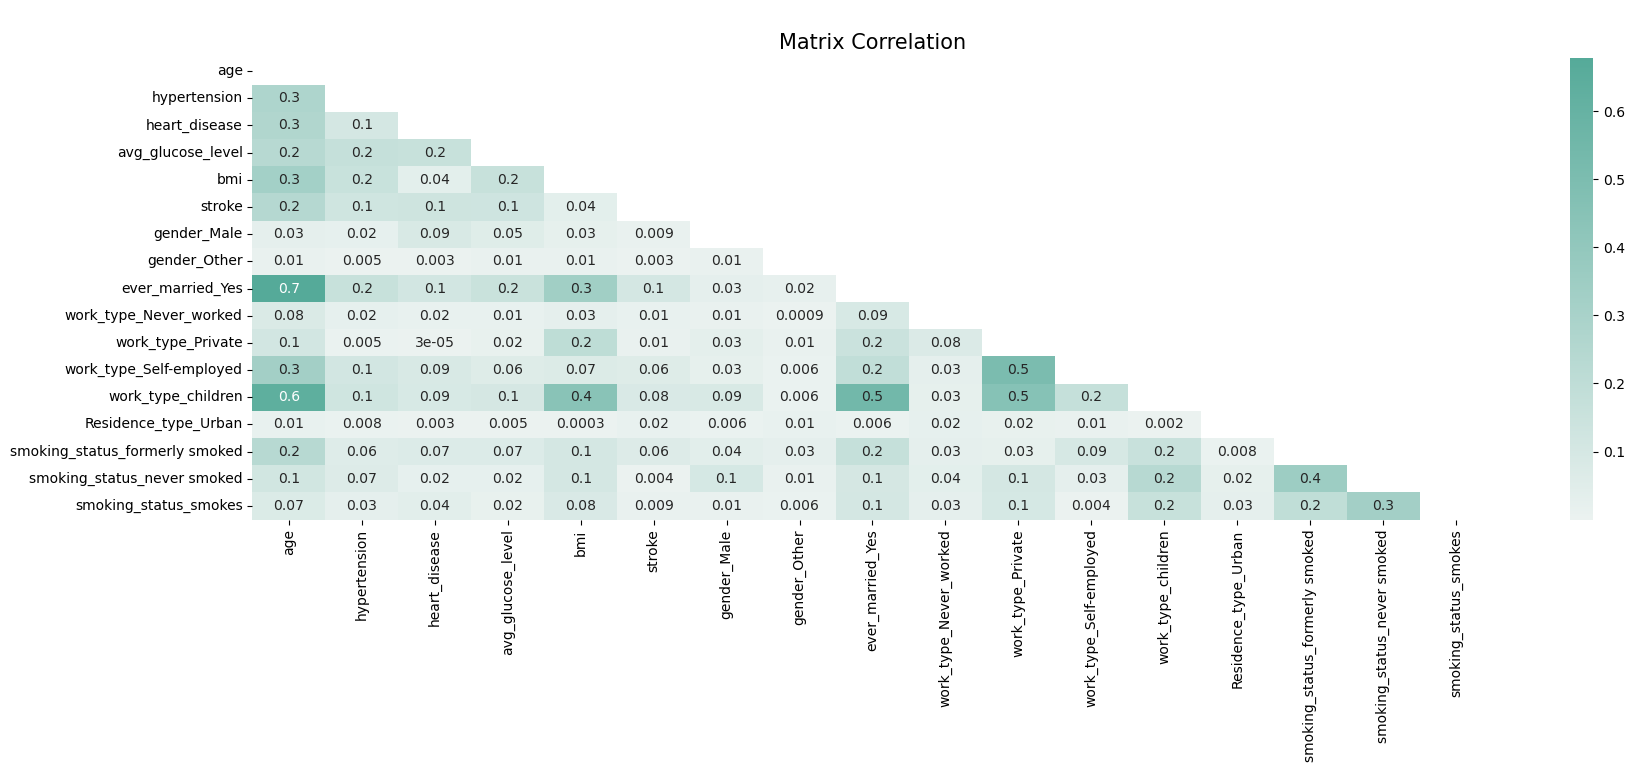

In [22]:
# DF Matrix Correlation.
df_corr = abs(stroke_data.corr())

# Matrix Plot.
plt.subplots(figsize=(20,6))
sns.heatmap(df_corr, annot=True, fmt='.1g', cmap=palette_matrix, cbar=True, mask=np.triu(df_corr))
plt.title('\nMatrix Correlation', fontsize=15)
plt.show()

# High and Less Correlation with Target

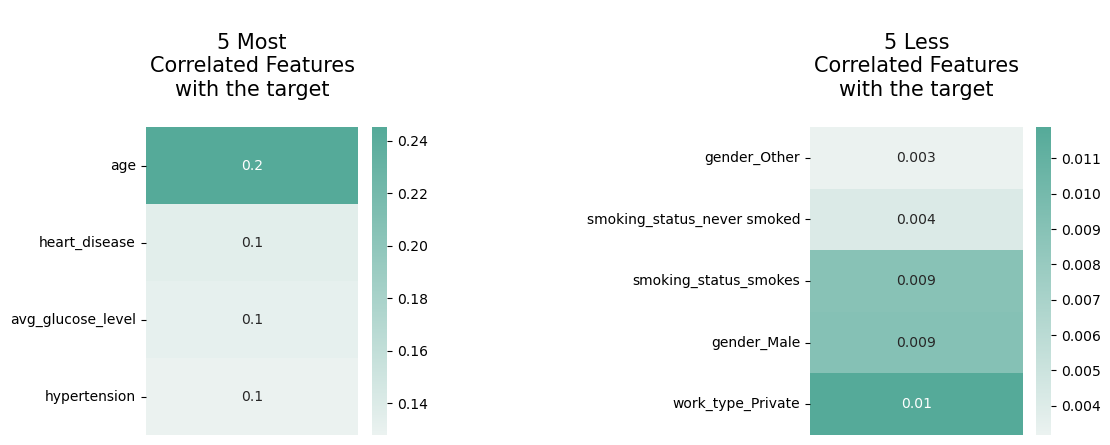

In [23]:
# DF with the features with the highest correlation and the target is removed.
corr_higher = pd.DataFrame(df_corr['stroke'].sort_values(ascending=False)).head()
corr_higher = corr_higher.drop('stroke', axis=0)

# DF with the features with less correlation.
corr_less = pd.DataFrame(df_corr['stroke'].sort_values()).head()

# List of DFs of Correlations
corr_ls = [corr_higher, corr_less]

# Plot Description.
description = [str(f'\n5 Most\nCorrelated Features\nwith the target\n'), str(f'5 Less\nCorrelated Features\nwith the target\n')]

# Grid Plot.
fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=1.5, hspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(corr_ls):
    ax = plt.subplot(gs[i])
    sns.heatmap(corr_ls[i], annot=True, fmt='.1g', cmap=palette_matrix, cbar=True)
    ax.set_title(description[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)
plt.show()

# Target distribution in Data

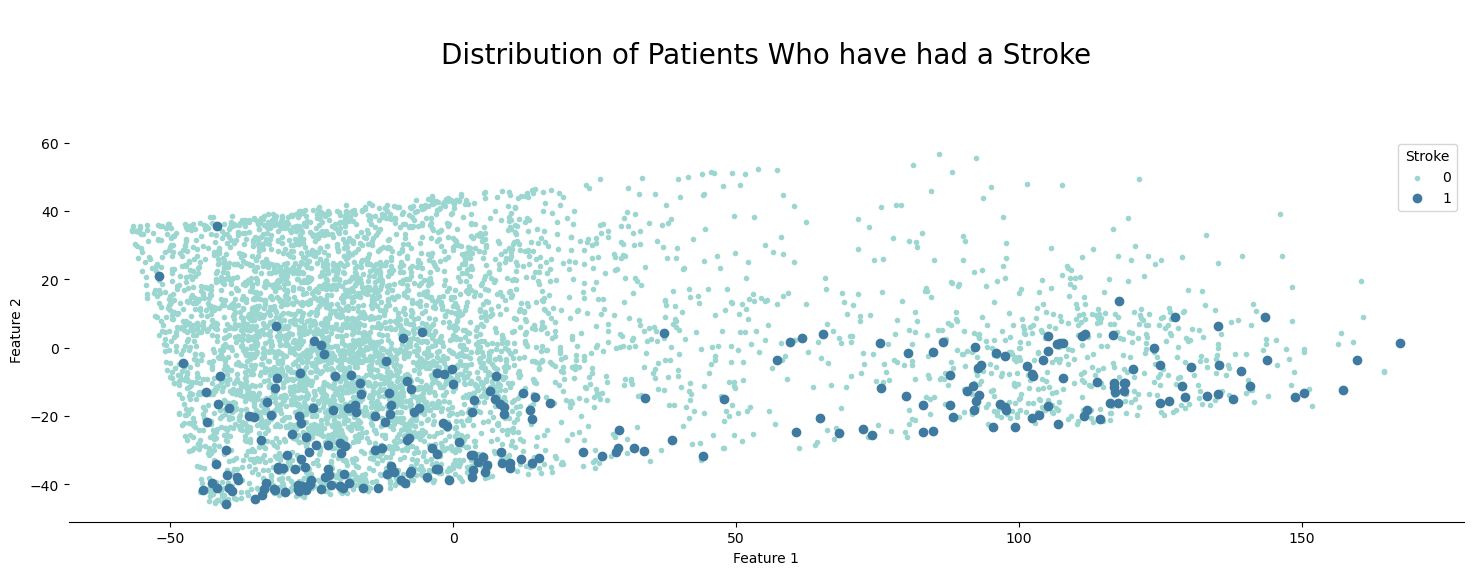

In [24]:
# Patients who have not had Stroke.
no_stroke = [df_reduce["feature_1"][df_reduce['stroke'] == 0], df_reduce["feature_2"][df_reduce['stroke'] == 0]]
# Patients who have had Stroke.
yes_stroke = [df_reduce["feature_1"][df_reduce['stroke'] == 1], df_reduce["feature_2"][df_reduce['stroke'] == 1]]

# Plot.
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(no_stroke[0], no_stroke[1], c="#9CD6D0", marker=".") # Green
ax.scatter(yes_stroke[0], yes_stroke[1], c="#3F7BA1", marker="o") # Blue
ax.set_title(f"\nDistribution of Patients Who have had a Stroke\n\n", fontsize=20)
ax.legend(stroke_data['stroke'].value_counts().index, title="Stroke")
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

# Stroke Prediction

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import (train_test_split,
                                    TimeSeriesSplit,
                                    KFold,
                                    StratifiedKFold,
                                    GroupKFold,
                                    StratifiedGroupKFold)

# Preprocessing Data

In [26]:
def get_prep_data():
    data = pd.read_csv(
        "healthcare-dataset-stroke-data.csv"
    )
    data["ever_married"] = (
        data["ever_married"].replace("Yes", True).replace("No", False)
    )
    data["gender"] = data["gender"].astype("category")
    data["smoking_status"] = data["smoking_status"].astype("category")
    data["Residence_type"] = data["Residence_type"].astype("category")
    data["work_type"] = data["work_type"].astype("category")
    data["doctor"] = np.random.randint(0, 8, size=len(data))
    holdout_ids = data.sample(n=500, random_state=529).index

    train = (
        data.loc[~data.index.isin(holdout_ids)]
        .sample(frac=1, random_state=529)
        .sort_values("doctor")
        .reset_index(drop=True)
    )
    holdout = (
        data.loc[data.index.isin(holdout_ids)]
        .sample(frac=1, random_state=529)
        .sort_values("doctor")
        .reset_index(drop=True)
    )

    return train, holdout


train, holdout = get_prep_data()

# Dividing into dependent and independent sets

In [27]:
def get_X_y(train):
    FEATURES = [
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "ever_married",
        "work_type",
        "Residence_type",
        "avg_glucose_level",
        "bmi",
        "smoking_status",
    ]

    GROUPS = "doctor"

    TARGET = "stroke"

    X = train[FEATURES]
    y = train[TARGET]
    groups = train[GROUPS]
    return X, y, groups

# Defining Classifier

In [28]:
import lightgbm as lgb

X, y, groups = get_X_y(train)
clf = lgb.LGBMClassifier(n_estimators=100)
clf.fit(X, y)
# Predict on training set
pred = clf.predict(X)
pred_prob = clf.predict_proba(X)[:, 1]

acc_score = accuracy_score(y, pred)
auc_score = roc_auc_score(y, pred_prob)

print(f'The score on the training set is accuracy: {acc_score:0.4f} and AUC of {auc_score:0.4f}')

The score on the training set is accuracy: 0.9911 and AUC of 0.9997


# Eavaluating Accuracy

In [29]:
X_holdout, y_holdout, groups_holdout = get_X_y(holdout)

pred = clf.predict(X_holdout)
pred_prob = clf.predict_proba(X_holdout)[:, 1]
acc_score = accuracy_score(y_holdout, pred)
auc_score = roc_auc_score(y_holdout, pred_prob)
print(
    f"Our accuracy on the holdout set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
)

Our accuracy on the holdout set is 0.9380 and AUC is 0.7802


In [30]:
acc_score = accuracy_score(y_holdout, np.zeros_like(y_holdout))
auc_score = roc_auc_score(y_holdout, np.zeros_like(y_holdout))
print(
    f"Our baseline on the holdout set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
)


Our baseline on the holdout set is 0.9480 and AUC is 0.5000


In [31]:
X, y, groups = get_X_y(train)

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.1)
clf = lgb.LGBMClassifier(n_estimators=100, max_depth=3)
clf.fit(X_tr, y_tr)
pred = clf.predict(X_val)
pred_prob = clf.predict_proba(X_val)[:, 1]
acc_score = accuracy_score(y_val, pred)
auc_score = roc_auc_score(y_val, pred_prob)
print(
    f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
)

Our accuracy on the validation set is 0.9523 and AUC is 0.8229


# Implementation using KFold

In [32]:
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


def plot_cv(cv, X, y, groups, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    
def get_fake_X_y():
    # Fake Generate the class/group data for an example
    n_points = 100
    X_ = np.random.randn(100, 10)

    percentiles_classes = [0.1, 0.9]
    y_ = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

    # Evenly spaced groups repeated once
    groups_ = np.hstack([[ii] * 10 for ii in range(10)])
    return X_, y_, groups_

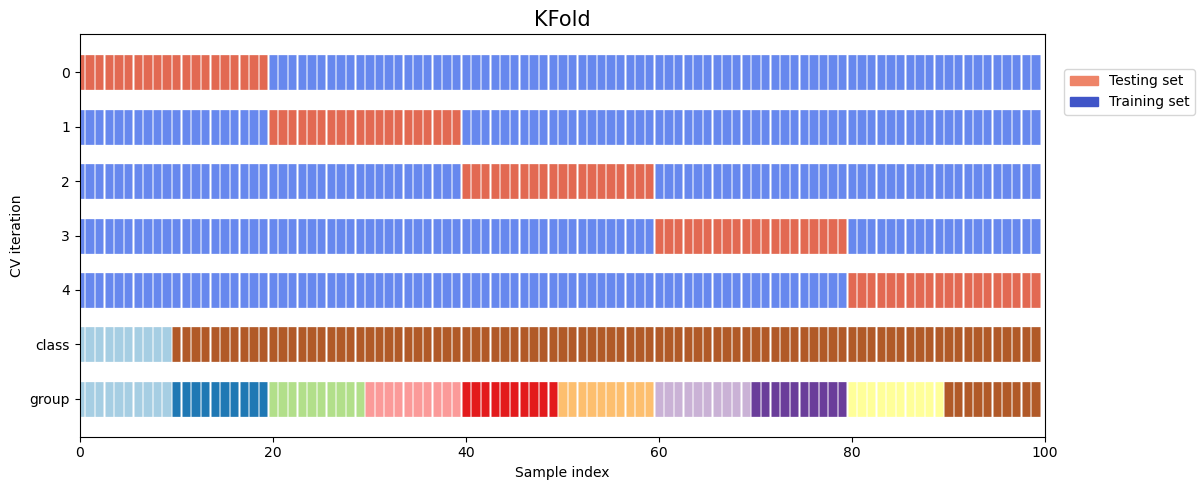

In [33]:
kf = KFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(KFold, X_, y_, groups_)

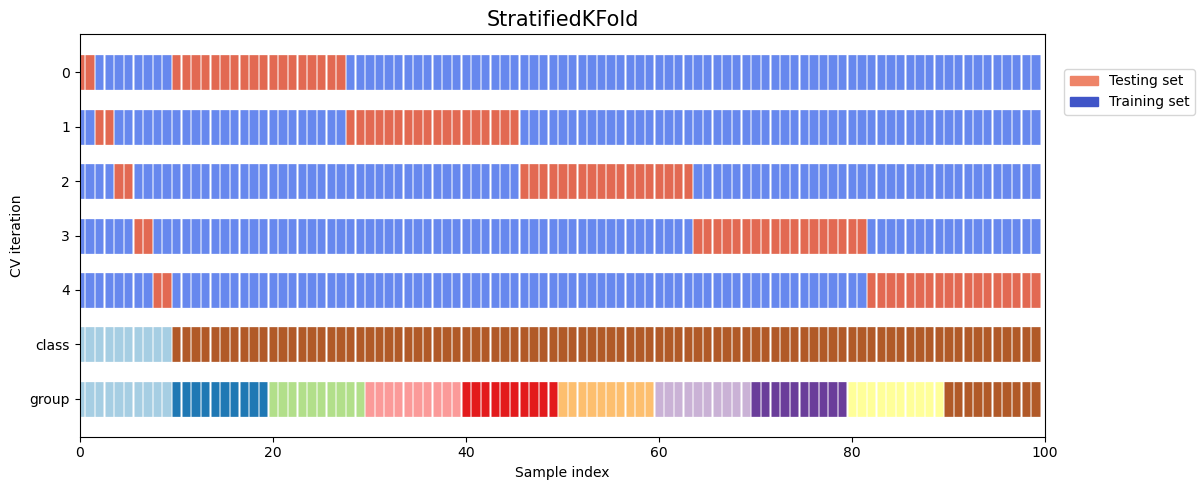

In [34]:
skf = StratifiedKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(StratifiedKFold, X_, y_, groups_)

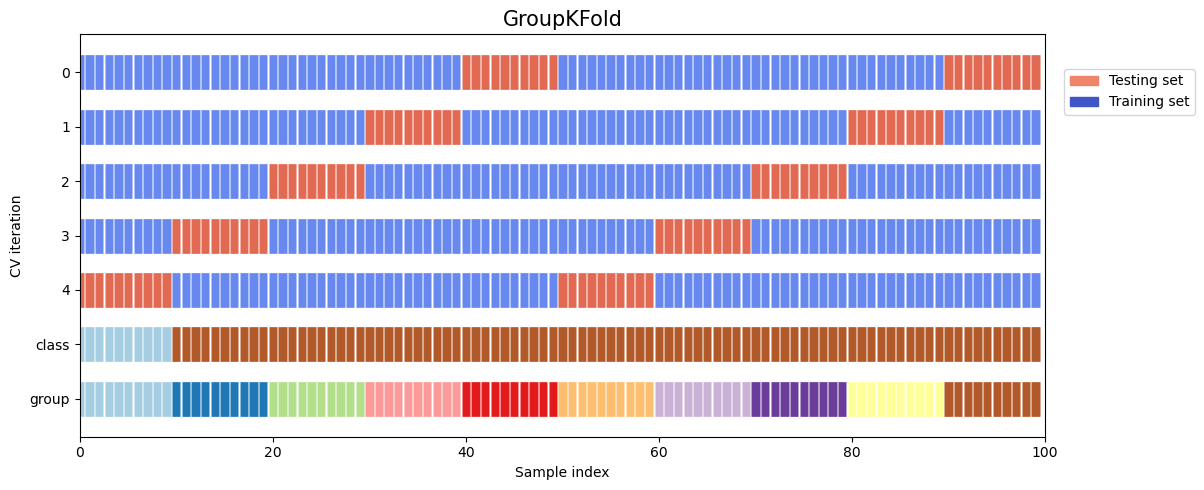

In [35]:
gkf = GroupKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(GroupKFold, X_, y_, groups_)

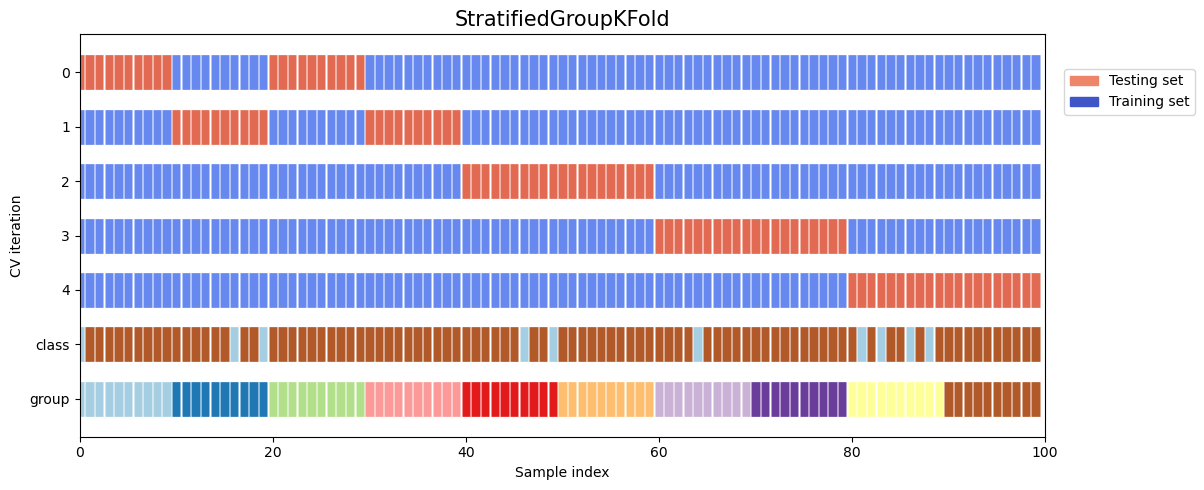

In [36]:
gskf = StratifiedGroupKFold()
X_, y_, groups_ = get_fake_X_y()
np.random.shuffle(y_)
plot_cv(StratifiedGroupKFold, X_, y_, groups_)

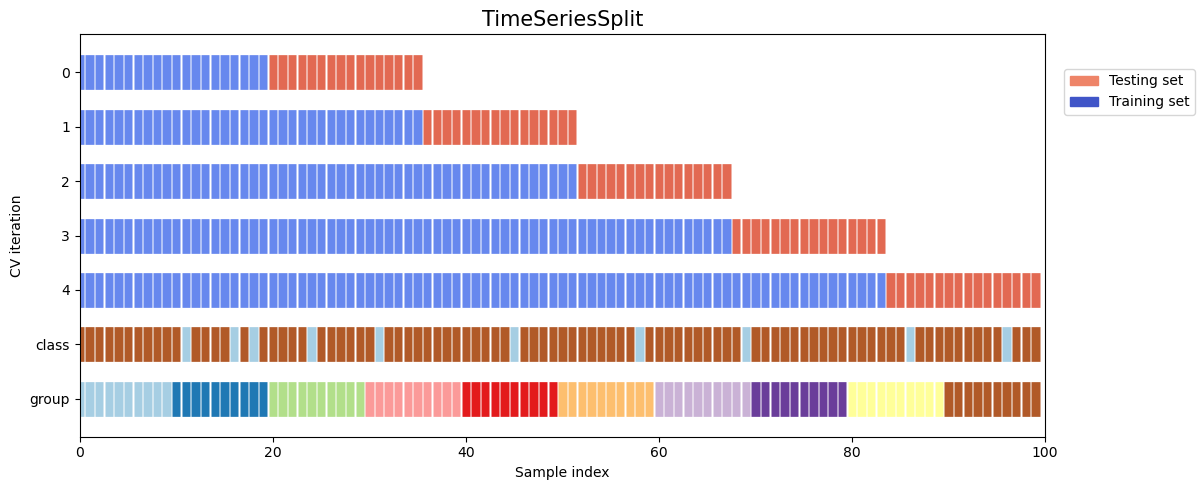

In [37]:
tss = TimeSeriesSplit()
X_, y_, groups_ = get_fake_X_y()
np.random.shuffle(y_)
plot_cv(TimeSeriesSplit, X_, y_, groups_)

In [38]:
sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

X, y, groups = get_X_y(train)

fold = 0
aucs = []
for train_idx, val_idx in sgk.split(X, y, groups):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    # Fit Model on Train
    clf = lgb.LGBMClassifier(n_estimators=100)
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_val)
    pred_prob = clf.predict_proba(X_val)[:, 1]
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    print(f"======= Fold {fold} ========")
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
    )
    fold += 1
    aucs.append(auc_score)
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')

======= Fold 0 ========
Our accuracy on the validation set is 0.9464 and AUC is 0.8401
======= Fold 1 ========
Our accuracy on the validation set is 0.9485 and AUC is 0.8333
======= Fold 2 ========
Our accuracy on the validation set is 0.9415 and AUC is 0.8195
======= Fold 3 ========
Our accuracy on the validation set is 0.9489 and AUC is 0.8012
======= Fold 4 ========
Our accuracy on the validation set is 0.9427 and AUC is 0.8505
Our out of fold AUC score is 0.8289
